In [261]:
PATH_PRICES_ZONE_1 = '~/dv/bsv_inference/data_raw/prices/zone_1.csv'
PATH_PRICES_ZONE_2 = '~/dv/bsv_inference/data_raw/prices/zone_2.csv'

PATH_TEMP_ZONE_1_GENERAL = '~/dv/bsv_inference/data_raw/temperature/IMOSCO132.csv'
PATH_TEMP_ZONE_1_HOUR4_RAW = '~/dv/bsv_inference/data_raw/temperature/imosco132_4.csv'
PATH_TEMP_ZONE_1_HOUR16_RAW = '~/dv/bsv_inference/data_raw/temperature/imosco132_16.csv'

PATH_TEMP_ZONE_1_HOUR4_PROCESSED = '~/dv/bsv_inference/data/df_temp4.csv'
PATH_TEMP_ZONE_1_HOUR16_PROCESSED = '~/dv/bsv_inference/data/df_temp16.csv'

PATH_HOLIDAYS = '~/dv/bsv_inference/data/df_holidays.csv'
PATH_HEATING = '~/dv/bsv_inference/data/df_heat.csv'
PATH_PROD_INDEX_RAW = '~/dv/bsv_inference/data_raw/RU_IndustrialProduction.xlsx'
PATH_PROD_INDEX_PROCESSED = '~/dv/bsv_inference/data/prod_index.csv'

PATH_MONDAYS = '~/dv/bsv_inference/data/mondays.csv'
PATH_SUNDAYS = '~/dv/bsv_inference/data/sundays.csv'
PATH_SATURDAYS = '~/dv/bsv_inference/data/saturdays.csv'

start_date = '2022-01-01'
end_date = '2024-01-01'

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import holidays
from datetime import datetime

%matplotlib inline

In [263]:
dap_zone1 = pd.read_csv(PATH_PRICES_ZONE_1).iloc[:, [2]]
dap_zone1.columns.values[0] = 'price'

In [264]:
date_range = pd.date_range(start=start_date, end=end_date, freq='h')
date_range = date_range[:-1]
dap_zone1['datetime'] = date_range
dap_zone1.set_index('datetime', inplace=True)
hour_4 = dap_zone1.between_time('04:00', '04:00')
hour_16 = dap_zone1.between_time('16:00', '16:00')
hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()

/tmp/ipykernel_26421/458412636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()
/tmp/ipykernel_26421/458412636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()


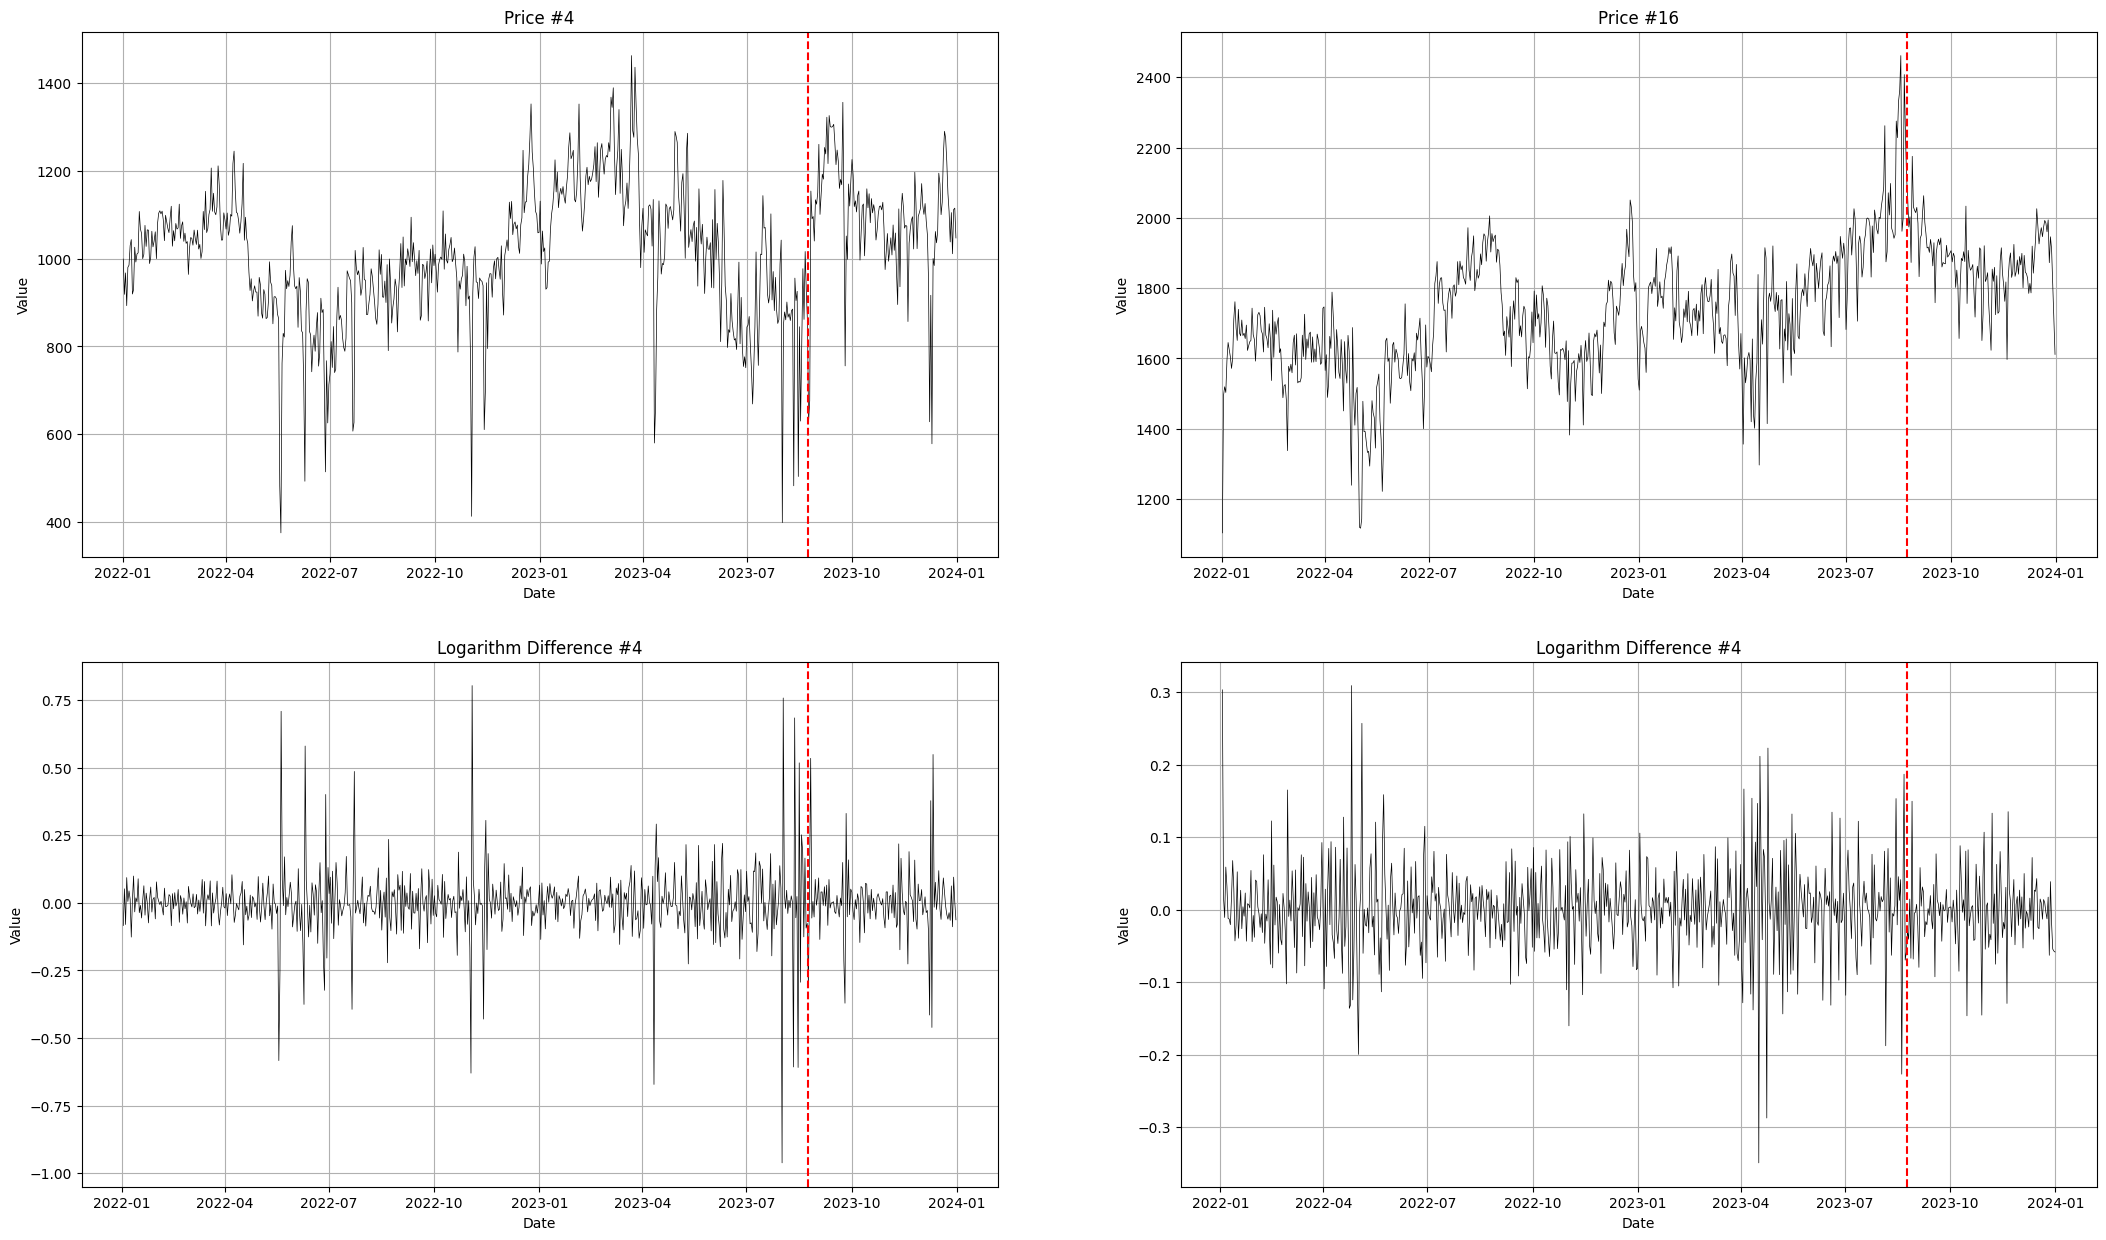

In [265]:
def plot_ts(dataframe, col):
    # Plot the time series data
    plt.plot(dataframe.index, dataframe[col], linestyle='-', color='black', linewidth = 0.5)
    plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(26, 15))

plt.subplot(2,2,1)
plt.plot(hour_4.index, hour_4['price'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Price #4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(hour_4.index, hour_16['price'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Price #16')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(hour_4.index, hour_4['log_diff'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Logarithm Difference #4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(hour_16.index, hour_16['log_diff'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Logarithm Difference #4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

In [266]:
def desc_stats(dataframe, col_name):
    data = dataframe[col_name]
    stats = data.describe(percentiles=[])
    skewness = data.skew()
    kurtosis = data.kurtosis()
    print(stats.round(2))
    print(f'skewness\t {skewness.round(2)}')
    print(f'kurtosis\t {kurtosis.round(2)}')

print('Descriptive Statistics for Hour 4:')
desc_stats(hour_4, 'price')
print('\n\nDescriptive Statistics for Hour 16:')
desc_stats(hour_16, 'price')

Descriptive Statistics for Hour 4:
count     730.00
mean     1018.64
std       151.43
min       375.12
50%      1027.92
max      1462.67
Name: price, dtype: float64
skewness	 -0.62
kurtosis	 1.6


Descriptive Statistics for Hour 16:
count     730.00
mean     1742.97
std       174.39
min      1103.72
50%      1743.42
max      2462.00
Name: price, dtype: float64
skewness	 -0.04
kurtosis	 1.26


In [267]:
df_temp4, df_temp16 = pd.read_csv(PATH_TEMP_ZONE_1_HOUR4_RAW)[:-1], pd.read_csv(PATH_TEMP_ZONE_1_HOUR16_RAW)[:-1]
df_temp4['Date'], df_temp16['Date'] = pd.to_datetime(df_temp4['Date']), pd.to_datetime(df_temp16['Date'])
df_temp4.set_index('Date', inplace=True), df_temp16.set_index('Date', inplace=True)

df_temp4['temp_f'], df_temp16['temp_f'] = (df_temp4['Temperature_C'] * 1.8) + 32, (df_temp16['Temperature_C'] * 1.8) + 32
df_temp4.drop(columns=['Temperature_C'], inplace=True), df_temp16.drop(columns=['Temperature_C'], inplace=True)

df_temp4['log_temp'], df_temp16['log_temp'] = np.log(df_temp4['temp_f']), np.log(df_temp16['temp_f'])
df_temp4.to_csv(PATH_TEMP_ZONE_1_HOUR4_PROCESSED, index=False), df_temp16.to_csv(PATH_TEMP_ZONE_1_HOUR16_PROCESSED, index=False)

(None, None)

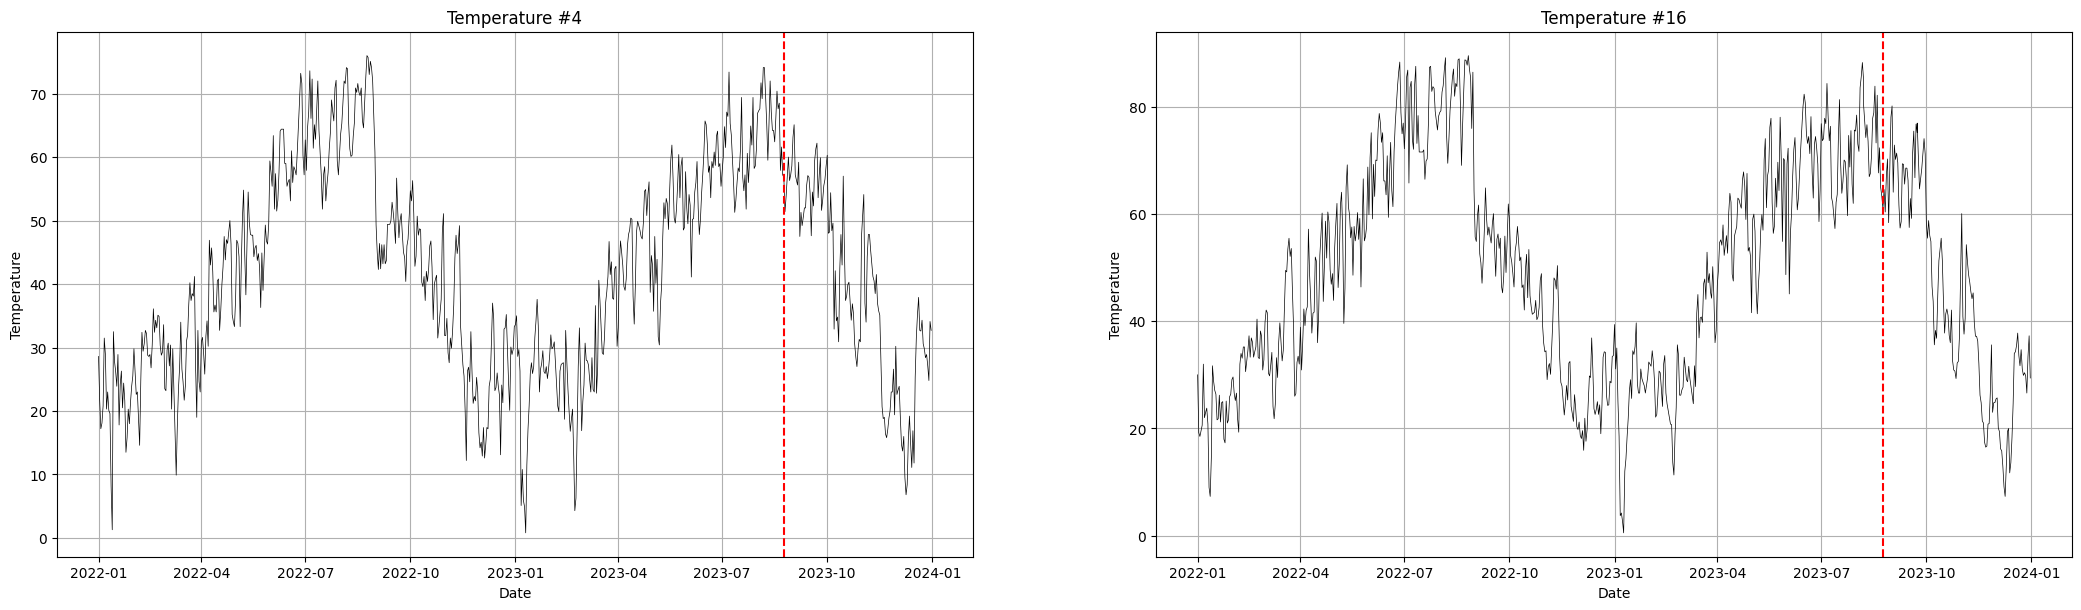

In [268]:
plt.figure(figsize=(26, 15))

plt.subplot(2,2,1)
plt.plot(df_temp4.index, df_temp4['temp_f'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Temperature #4')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(df_temp16.index, df_temp16['temp_f'], linestyle='-', color='black', linewidth = 0.5)
plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
plt.title('Temperature #16')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

In [269]:
ru_holidays = holidays.country_holidays('RU')

dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[:-1]

d = {'dates' : dates, 'holiday' : [date in ru_holidays for date in dates]}
df_holidays = pd.DataFrame(data=d)
df_holidays.to_csv(PATH_HOLIDAYS,index=False)

In [270]:
heating_period = np.concatenate((pd.date_range(start=start_date, end='2022-04-15', freq='D'), pd.date_range(start='2022-10-15', end='2023-04-15', freq='D'), pd.date_range(start='2023-10-15', end='2023-12-31', freq='D')), axis=None)

dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[:-1]

d = {'dates' : dates, 'heating' : [date in heating_period for date in dates]}
df_heat = pd.DataFrame(data=d)
df_heat.to_csv(PATH_HEATING,index=False)

In [271]:
df_prod_first_index = '2015-01-01'
df_prod_last_index = '2024-01-01'

df_prod = pd.read_excel(PATH_PROD_INDEX_RAW, sheet_name=1).iloc[4][2:-1]
prod_dates = pd.date_range(start=df_prod_first_index, end=df_prod_last_index, freq='MS')
df_prod = pd.DataFrame(df_prod)
df_prod['month'] = prod_dates.values
df_prod.set_index('month', inplace=True)
df_prod.reset_index(inplace=True)
df_prod.rename(columns={df_prod.columns.values[1]: 'index_industrial'}, inplace=True)


df_prod = df_prod[(df_prod['month'] >= start_date) & (df_prod['month'] <= end_date)][:-1]
df_prod.to_csv(PATH_PROD_INDEX_PROCESSED, index=False)

In [272]:
saturdays_array = [1 if date.weekday() == 5 else 0 for date in dates]
sundays_array = [1 if date.weekday() == 6 else 0 for date in dates]
mondays_array = [1 if date.weekday() == 0 else 0 for date in dates]

pd.Series(mondays_array).to_csv(PATH_MONDAYS, index=False),
pd.Series(saturdays_array).to_csv(PATH_SATURDAYS, index=False),
pd.Series(sundays_array).to_csv(PATH_SUNDAYS, index=False)